<img src="../img/crowdlearning-etic.png" alt="Logo ETIC" align="right">


<h1><font color="#004D7F" size=6>K Vecinos más cercanos</font></h1>

<br>
<br>
<br>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Antonio Jesús Gil</font><br>
<font color="#004D7F" size=3>Fundamentos de Machine Learning</font><br>

</div>

Clasificación Supervisada

Este método estima la probabilidad que un elemento `x` pertenezca a una clase `C`

En el reconocimiento de patrones, este algoritmo es usado como método de clasificacion de objetos, basado en un etrenamiento mediante elementos cercanos en el espacio.

Trabaja con gran cantidad de clases y su implementación es sencilla.

- Calcula la distancia del punto a clasificar con respecto al resto de elementos
- Ordena los puntos en función de la distancia, de menor a mayor
- Predice el grupo al que pertenece en función de la clase a la que pertenecen los `K` elementos más cercanos

<img src="../img/knn3.png" height="300" width="300">

Este ejercicio consiste en una base de datos donde se muestran diferentes tipos de vehiculos en función de sus caracteristicas.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
vehiculos = pd.read_csv('vehiculos.csv')
vehiculos.head(4)

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van


In [36]:
vehiculos['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [37]:
#Variable objetivo sera el tipo de vehiculos
Y = vehiculos['vehicle_class']
X = vehiculos.drop('vehicle_class', axis=1)

In [38]:
print(X.head(3))
print(Y.head(3))

   compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   

   scaled_variance_major_axis  scaled_variance_minor_axis  \
0                       176.0                       379.0   
1                       170.0                       330

Comenzamos a construir el modelo indicando que `K-neighbors` sea igual a 1

In [39]:
# Modelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

predicciones = knn.predict(X_test)

In [40]:
predicciones[0:19]

array(['saab', 'opel', 'saab', 'opel', 'saab', 'van', 'saab', 'opel',
       'saab', 'van', 'opel', 'bus', 'van', 'opel', 'opel', 'van', 'opel',
       'saab', 'bus'], dtype=object)

In [41]:
# Matriz de confusión y predccion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [42]:
print(classification_report(Y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

   micro avg       0.64      0.64      0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



Optimización del modelo para `Kn's`

In [43]:
tasa_error = [] # lista vacia
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != Y_test)) # diferencia entre las tasas encontradas 
    
    # la tasa de error mas baja será nuestro K más optimo

In [44]:
# tasa_error

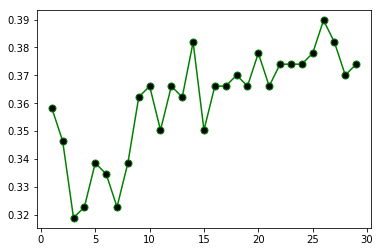

In [45]:
valores = range(1,30)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='black', markersize='7')

In [46]:
# El valor mas optimo es k=3

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
prediccion = knn.predict(X_test)
print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

   micro avg       0.68      0.68      0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254

